In [128]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
from pandas import DataFrame

In [107]:
df = read_csv('UNRATE.csv', header=0, index_col=0)

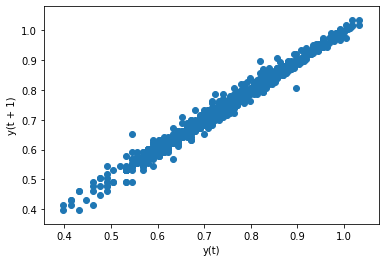

In [108]:
lag_plot(df)

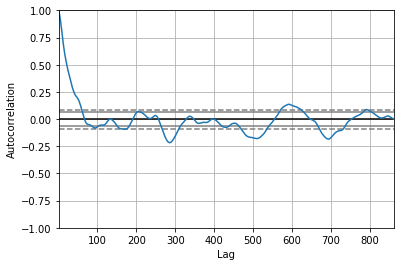

In [109]:
autocorrelation_plot(df)

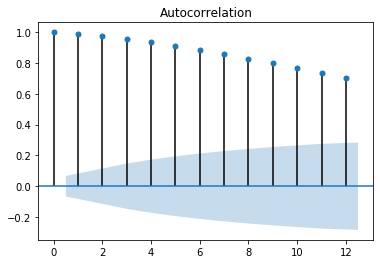

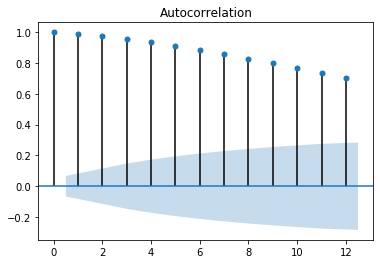

In [110]:
plot_acf(df, lags=12)

In [111]:
X = df.values

In [112]:
X

array([[0.53147892],
       [0.5797836 ],
       [0.60205999],
       [0.59106461],
       [0.54406804],
       [0.5563025 ],
       [0.5563025 ],
       [0.59106461],
       [0.5797836 ],
       [0.56820172],
       [0.5797836 ],
       [0.60205999],
       [0.63346846],
       [0.67209786],
       [0.69897   ],
       [0.72427587],
       [0.78532983],
       [0.79239169],
       [0.8260748 ],
       [0.83250891],
       [0.81954394],
       [0.89762709],
       [0.80617997],
       [0.81954394],
       [0.81291336],
       [0.80617997],
       [0.79934055],
       [0.76342799],
       [0.74036269],
       [0.73239376],
       [0.69897   ],
       [0.65321251],
       [0.64345268],
       [0.62324929],
       [0.62324929],
       [0.63346846],
       [0.56820172],
       [0.53147892],
       [0.53147892],
       [0.49136169],
       [0.47712126],
       [0.50514998],
       [0.49136169],
       [0.49136169],
       [0.51851394],
       [0.54406804],
       [0.54406804],
       [0.491

In [113]:
train, test = X[1:len(X)-260], X[len(X)-260:]

In [114]:
model = AR(train)

In [115]:
model_fit = model.fit()

In [116]:
print('Lag: %s' % model_fit.k_ar)

Lag: 19


In [117]:
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 1.07827080e-02  1.02319967e+00  1.40106336e-01 -4.14304518e-02
 -5.03545511e-02  1.27102398e-02 -1.10119130e-01  4.66286553e-03
  7.42338530e-02 -5.36692576e-02 -1.27651380e-01  1.56554026e-01
 -1.87984237e-01  9.82876588e-02  7.70319519e-02  8.02322756e-04
 -4.10966074e-02  2.94895963e-03  4.81694554e-03  2.24374720e-03]


In [118]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [119]:
print(len(predictions))

260


In [120]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=0.666720, expected=0.662758
predicted=0.665921, expected=0.672098
predicted=0.664467, expected=0.633468
predicted=0.670718, expected=0.643453
predicted=0.669844, expected=0.653213
predicted=0.669885, expected=0.653213
predicted=0.675807, expected=0.653213
predicted=0.676284, expected=0.662758
predicted=0.679154, expected=0.653213
predicted=0.684530, expected=0.643453
predicted=0.684492, expected=0.643453
predicted=0.687917, expected=0.633468
predicted=0.689821, expected=0.643453
predicted=0.691195, expected=0.623249
predicted=0.694025, expected=0.633468
predicted=0.694808, expected=0.623249
predicted=0.695862, expected=0.633468
predicted=0.698030, expected=0.633468
predicted=0.698346, expected=0.623249
predicted=0.699041, expected=0.623249
predicted=0.700171, expected=0.612784
predicted=0.700136, expected=0.612784
predicted=0.701081, expected=0.602060
predicted=0.701526, expected=0.602060
predicted=0.701825, expected=0.612784
predicted=0.702537, expected=0.602060
predicted=0.

In [121]:
mse = mean_squared_error(test, predictions)

In [122]:
print('Test MSE: %.3f' % mse)

Test MSE: 0.014


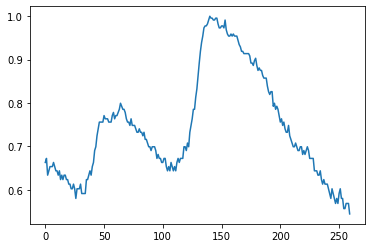

In [123]:
pyplot.plot(test)

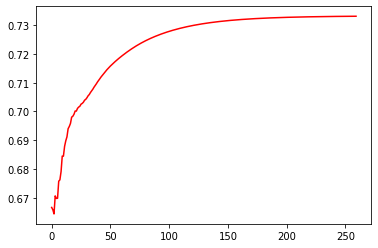

In [124]:
pyplot.plot(predictions, color='red')

In [125]:
rmse = sqrt(mse)

In [126]:
print('Root Mean Squared Error: %.3f' % rmse)

Root Mean Squared Error: 0.120


In [130]:
residuals = DataFrame(model_fit.resid)

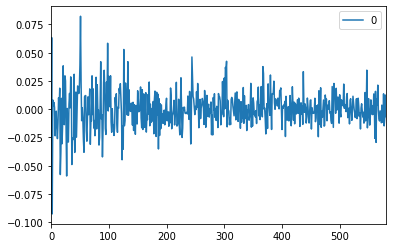

In [131]:
residuals.plot()

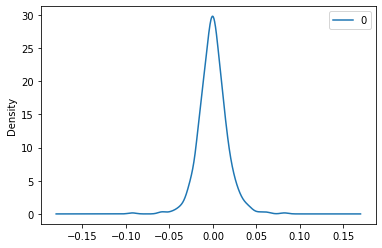

In [132]:
residuals.plot(kind='kde')

In [133]:
print(residuals.describe())

                  0
count  5.810000e+02
mean   3.137097e-15
std    1.620321e-02
min   -9.268526e-02
25%   -9.434569e-03
50%   -4.127244e-04
75%    8.820881e-03
max    8.227236e-02
